In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "field",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 7719 files belonging to 184 classes.


In [4]:
class_name = dataset.class_names
class_name

['abies_concolor',
 'abies_nordmanniana',
 'acer_campestre',
 'acer_ginnala',
 'acer_griseum',
 'acer_negundo',
 'acer_palmatum',
 'acer_pensylvanicum',
 'acer_platanoides',
 'acer_pseudoplatanus',
 'acer_rubrum',
 'acer_saccharinum',
 'acer_saccharum',
 'aesculus_flava',
 'aesculus_glabra',
 'aesculus_hippocastamon',
 'aesculus_pavi',
 'ailanthus_altissima',
 'albizia_julibrissin',
 'amelanchier_arborea',
 'amelanchier_canadensis',
 'amelanchier_laevis',
 'asimina_triloba',
 'betula_alleghaniensis',
 'betula_jacqemontii',
 'betula_lenta',
 'betula_nigra',
 'betula_populifolia',
 'broussonettia_papyrifera',
 'carpinus_betulus',
 'carpinus_caroliniana',
 'carya_cordiformis',
 'carya_glabra',
 'carya_ovata',
 'carya_tomentosa',
 'castanea_dentata',
 'catalpa_bignonioides',
 'catalpa_speciosa',
 'cedrus_atlantica',
 'cedrus_deodara',
 'cedrus_libani',
 'celtis_occidentalis',
 'celtis_tenuifolia',
 'cercidiphyllum_japonicum',
 'cercis_canadensis',
 'chamaecyparis_pisifera',
 'chamaecyparis

In [5]:
len(dataset)

242

In [6]:
242*32

7744

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[127 169 177  52  30 116 181 109 162 134 150  17  15 181  73  73  22  10
 171  61  44 137  21  58 156  60 103  85  88 181 169 162]


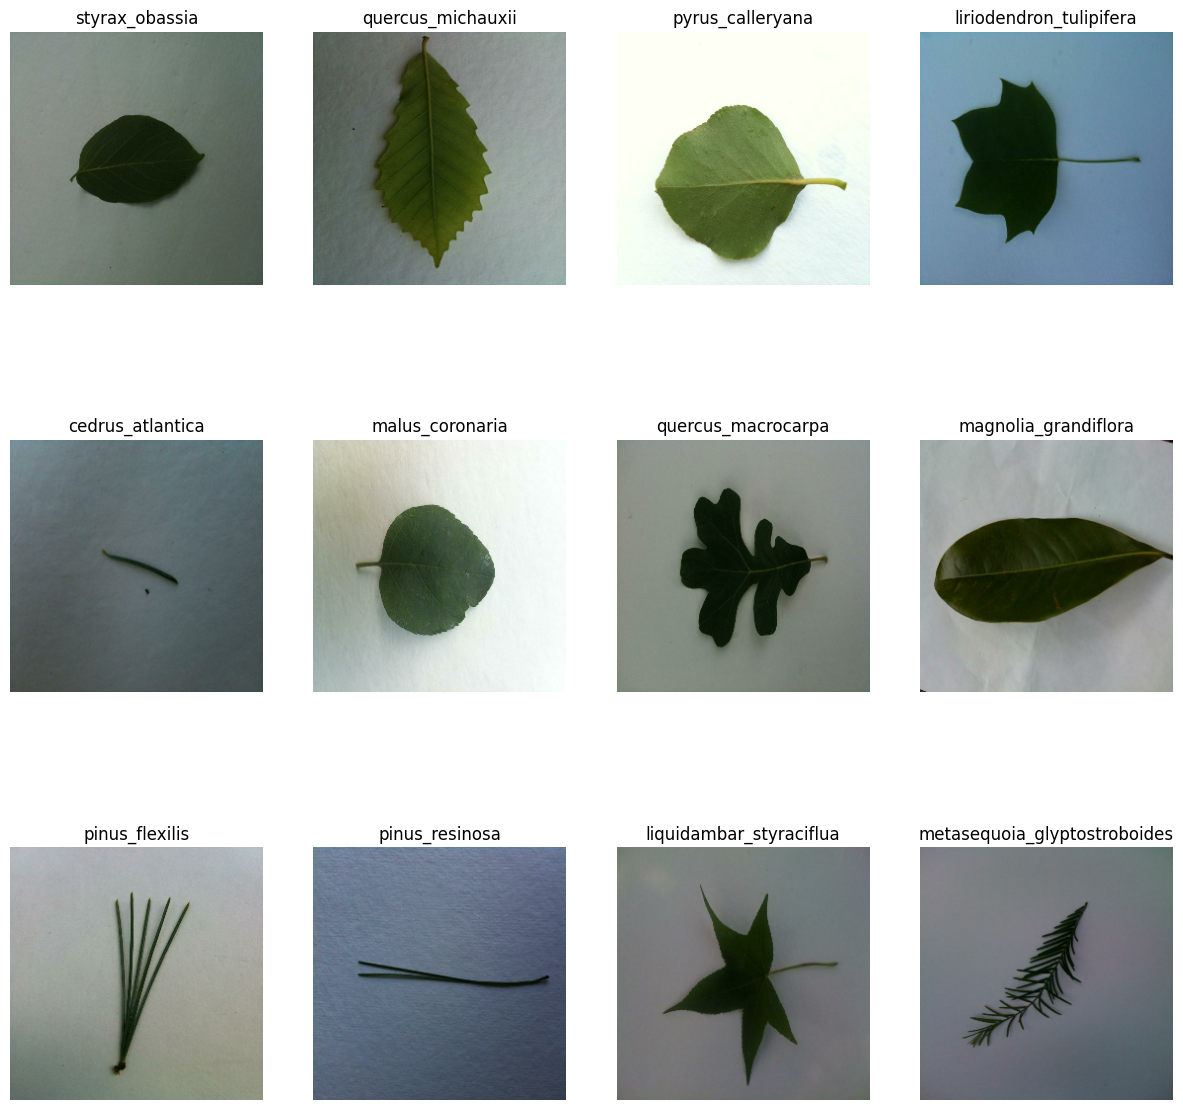

In [8]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [16]:
train_size = 0.8
len(dataset)*train_size

193.60000000000002

In [17]:
train_ds = dataset.take(193)
len(train_ds)

193

In [18]:
test_ds = dataset.skip(193)
len(test_ds)

49

In [19]:
val_size = 0.1
len(dataset)*val_size

24.200000000000003

In [20]:
val_ds = test_ds.take(24)
len(val_ds)

24

In [21]:
test_ds = test_ds.skip(24)
len(test_ds)

25

In [9]:
def get_dataset_partition(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [10]:
train_ds, val_ds, test_ds = get_dataset_partition(dataset)